### Regularized Linear Regression
- 다이아몬드의 특성을 회귀분석하여, 예상 가격을 예측한다.

In [1]:
import pandas as pd

d_df = pd.read_csv('./datasets/diamond.csv', low_memory=False)
d_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [2]:
d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [3]:
d_df.duplicated().sum()

0

In [4]:
d_df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [5]:
pre_d_df = d_df.drop(labels=['Unnamed: 0'], axis=1)
pre_d_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [6]:
pre_d_df.cut.value_counts()

cut
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: count, dtype: int64

In [7]:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

def encode_cut(cut):
    return cut_order.index(cut)

In [8]:
pre_d_df.cut = pre_d_df.cut.apply(encode_cut)
pre_d_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,4,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,3,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,3,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [9]:
pre_d_df.clarity.value_counts()

clarity
SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [10]:
clarity_order = ['I1', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2']

def encode_clarity(clarity):
    return clarity_order.index(clarity)

In [11]:
pre_d_df.clarity = pre_d_df.clarity.apply(encode_clarity)
pre_d_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,E,7,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,6,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,7,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,H,7,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,4,D,7,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,3,E,6,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,3,F,6,59.8,62.0,2756,5.74,5.73,3.43


In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
result = encoder.fit_transform(pre_d_df.color)
pre_d_df.color = result
pre_d_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,1,7,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,6,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,7,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,4,7,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,4,0,7,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,3,1,6,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,3,2,6,59.8,62.0,2756,5.74,5.73,3.43


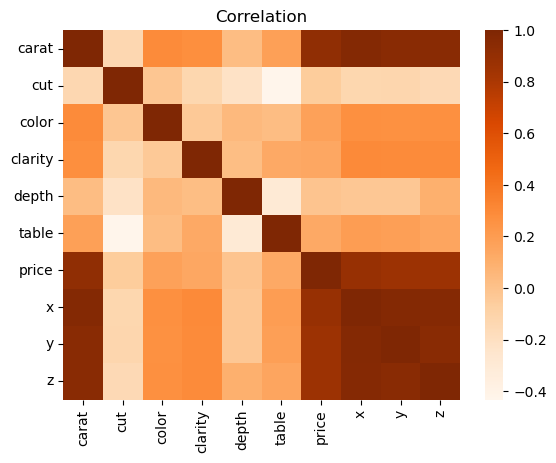

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = pre_d_df.corr()
corr_graph = sns.heatmap(corr, cmap='Oranges')
corr_graph.set_title('Correlation')
plt.show()

In [14]:
corr

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134964,0.291439,0.274662,0.028234,0.181602,0.921591,0.975093,0.951721,0.953387
cut,-0.134964,1.000000,-0.020506,-0.129024,-0.218037,-0.433387,-0.053487,-0.125564,-0.121461,-0.149320
color,0.291439,-0.020506,1.000000,-0.041313,0.047316,0.026457,0.172520,0.270281,0.263579,0.268226
clarity,0.274662,-0.129024,-0.041313,1.000000,0.020745,0.130412,0.141886,0.300058,0.291108,0.293242
depth,0.028234,-0.218037,0.047316,0.020745,1.000000,-0.295798,-0.010630,-0.025289,-0.029340,0.094927
table,0.181602,-0.433387,0.026457,0.130412,-0.295798,1.000000,0.127118,0.195333,0.183750,0.150915
price,0.921591,-0.053487,0.172520,0.141886,-0.010630,0.127118,1.000000,0.884433,0.865419,0.861249
x,0.975093,-0.125564,0.270281,0.300058,-0.025289,0.195333,0.884433,1.000000,0.974701,0.970771
y,0.951721,-0.121461,0.263579,0.291108,-0.029340,0.183750,0.865419,0.974701,1.000000,0.952005
z,0.953387,-0.149320,0.268226,0.293242,0.094927,0.150915,0.861249,0.970771,0.952005,1.000000


In [15]:
corr['price'].sort_values(ascending=False)[1:]

carat      0.921591
x          0.884433
y          0.865419
z          0.861249
color      0.172520
clarity    0.141886
table      0.127118
depth     -0.010630
cut       -0.053487
Name: price, dtype: float64

In [16]:
pre_d_df.loc[:, 'target'] = pre_d_df.price
pre_d_df = pre_d_df.drop(labels=['price'], axis=1)
pre_d_df

,carat,cut,color,clarity,depth,table,x,y,z,target
0,0.23,4,1,7,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,1,6,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1,6,7,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,4,7,61.0,58.0,6.15,6.12,3.74,2757
53939,0.75,4,0,7,62.2,55.0,5.83,5.87,3.64,2757
53940,0.71,3,1,6,60.5,55.0,5.79,5.74,3.49,2756
53941,0.71,3,2,6,59.8,62.0,5.74,5.73,3.43,2756


In [20]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    # MSLE = mean_squared_log_error(y_test, prediction)
    # RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_d_df.iloc[:, :-1], pre_d_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [29]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 1992942.0599, RMSE: 1411.7160, R2: 0.8747


<Axes: >

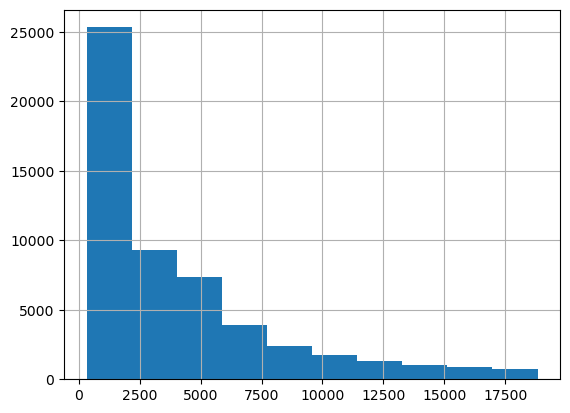

In [30]:
pre_d_df.target.hist()

<Axes: >

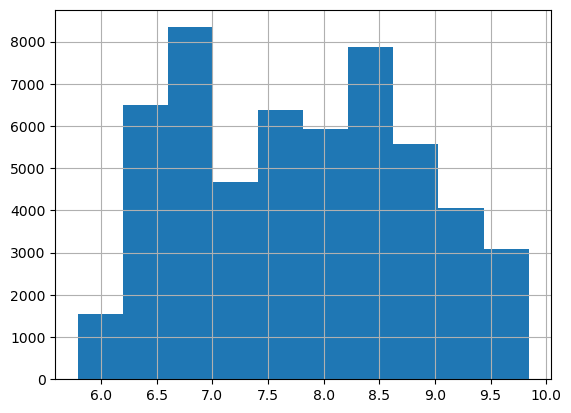

In [31]:
np.log1p(pre_d_df.target).hist()

In [32]:
pre_d_df.target = np.log1p(pre_d_df.target)
pre_d_df

,carat,cut,color,clarity,depth,table,x,y,z,target
0,0.23,4,1,7,61.5,55.0,3.95,3.98,2.43,5.789960
1,0.21,3,1,6,59.8,61.0,3.89,3.84,2.31,5.789960
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,5.793014
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,5.814131
4,0.31,1,6,7,63.3,58.0,4.34,4.35,2.75,5.817111
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,4,7,61.0,58.0,6.15,6.12,3.74,7.922261
53939,0.75,4,0,7,62.2,55.0,5.83,5.87,3.64,7.922261
53940,0.71,3,1,6,60.5,55.0,5.79,5.74,3.49,7.921898
53941,0.71,3,2,6,59.8,62.0,5.74,5.73,3.43,7.921898


In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_d_df.iloc[:, :-1], pre_d_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [34]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0735, RMSE: 0.2712, R2: 0.9283


In [38]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

features, targets = pre_d_df.iloc[:, :-1], pre_d_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=1).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [39]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0735, RMSE: 0.2712, R2: 0.9283


In [47]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

features, targets = pre_d_df.iloc[:, :-1], pre_d_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

lasso = Lasso(alpha=0.5, max_iter=10000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.5, max_iter=10000)

In [48]:
prediction = lasso.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.2818, RMSE: 0.5308, R2: 0.7253
